## Варіант 5
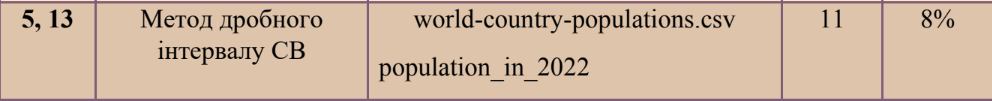


Імпортуємо необхідні для роботи бібліотеки. Зчитаємо дані із файлу *data.csv* та запишемо в окрему змінну досліджувану ознаку - **population_in_2022**. Порожні комірки заповнимо середнім значенням ГС.

In [20]:
import random
import pandas as pd
import timeit

df = pd.read_csv('data.csv')
data = df['population_in_2022']
mean = data.mean()
data.fillna(value=mean, inplace=True)

Створимо функцію для методу дробного інтервалу СВ, яка в якості аргументів приймає дані та розмір вибірки.

In [37]:
def fractional_interval(data, n):
  N = len(data)
  a = N / n
  alpha = random.uniform(1.0, a)
  sample = [data[int(alpha + i * a)] for i in range(n)]
  return sample

Згенеруємо *m=1* вибірок, використовуючи `fractional_interval`.

In [38]:
m = 11
size = int(0.08 * len(data))
samples = []
for i in range(m):
  start = timeit.default_timer()
  sample = fractional_interval(data, size)
  end = timeit.default_timer()
  tracked_time = end - start
  samples.append(pd.Series(sample))

Обчислимо середнє значення ознаки всiєї генеральної сукупностi та порiвняємо його з середнiми
значеннями зроблених виборок, а також знайдемо міжгрупове стандартне вiдхилення цiєї
ознаки.

In [39]:
data_mean = data.mean()
sample_means = [item.mean().round(1) for item in samples]
group_std = pd.concat(samples).std()

print(f'Середнє значення ГС: {data_mean.round(1)}')
print(f'Середні значення виборок: {sample_means}')
print(f'Міжгрупове стандартне відхилення: {group_std.round(1)}')
print(f'Час виконання алгоритму: {tracked_time}')

Середнє значення ГС: 2607826.5
Середні значення виборок: [2631996.9, 2847632.8, 2614785.6, 2615946.3, 2417224.9, 2613939.4, 2473934.0, 2555384.8, 2415736.8, 2474963.3, 2623307.5]
Міжгрупове стандартне відхилення: 3428042.6
Час виконання алгоритму: 0.00018820899981619732
